In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import numpy as np


In [2]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data  # Flattened image data
y = lfw_people.target  # Labels (person indices)
target_names = lfw_people.target_names  # Names of people

print(f"Loaded {X.shape[0]} images of {len(target_names)} people")


Loaded 1288 images of 7 people


In [3]:
n_components = 150  # Number of PCA components
pca = PCA(n_components=n_components, whiten=True).fit(X)
X_pca = pca.transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)


In [5]:
model = SVC(kernel='linear', class_weight='balanced')  # Linear SVM
model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear')

In [6]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.69      0.60        13
     Colin Powell       0.73      0.80      0.76        60
  Donald Rumsfeld       0.55      0.67      0.60        27
    George W Bush       0.88      0.84      0.86       146
Gerhard Schroeder       0.67      0.72      0.69        25
      Hugo Chavez       0.78      0.47      0.58        15
       Tony Blair       0.84      0.72      0.78        36

         accuracy                           0.77       322
        macro avg       0.71      0.70      0.70       322
     weighted avg       0.79      0.77      0.78       322



In [7]:
import matplotlib.pyplot as plt


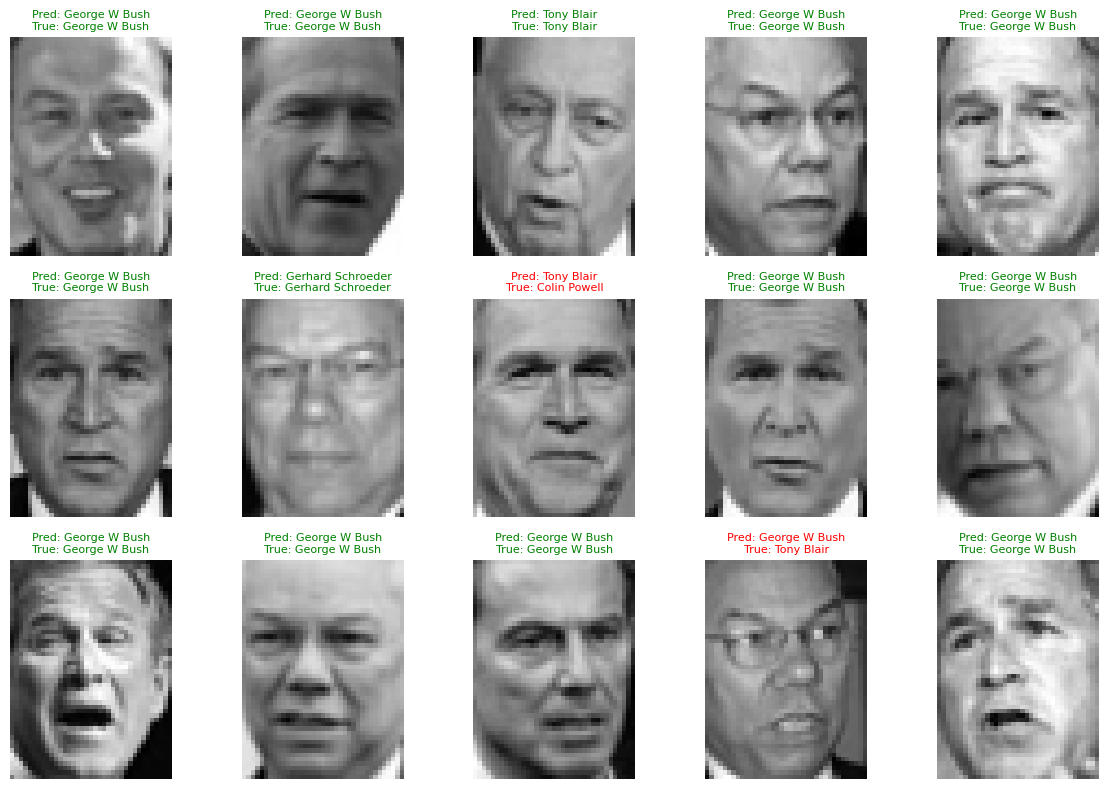

In [10]:
import matplotlib.pyplot as plt

# Select a few test images to visualize
n_images = 15
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

# Get indices of X_test in original data X
_, X_test_indices = np.unique(X_test, axis=0, return_index=True)

for i, ax in enumerate(axes.flat):
    # Index of the original image
    original_idx = X_test_indices[i]

    # Show the original image from the dataset
    ax.imshow(lfw_people.images[original_idx], cmap='gray')

    # Get predicted and true names
    pred_label = target_names[y_pred[i]]
    true_label = target_names[y_test[i]]

    # Highlight mismatches in red
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=8, color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()
